> **1\. DATA MINING**

In [171]:
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')



In [172]:
#Method 1: restore AdvantureWorksDW2019.bak file, run sqlview.sql file
cnxn = pyodbc.connect("Driver={SQL Server};"
            "Server=LAPTOP-EPADQ5CQ;"
            "Database=AdventureWorksDW2019;"
            "Trusted_Connection=yes;"
        )

In [173]:
data = pd.read_sql_query('SELECT * FROM AdventureWorksDW2019..vSales', cnxn)

In [174]:
#Method 2: 
#data = pd.read_csv('vSales.csv')

In [175]:
df = data.copy()

In [176]:
df.head()

,OrderDateKey,CalendarYear,EnglishMonthName,OrderDate,SalesOrderNumber,EnglishPromotionType,EnglishProductSubcategoryName,EnglishProductCategoryName,CustomerKey,BirthDate,Gender,YearlyIncome,SalesTerritoryGroup,DiscountAmount,SalesAmount
0,20101229,2010,December,2010-12-29,SO43697,No Discount,Road Bikes,Bikes,21768,1952-02-19,M,70000.0,North America,0.0,3578.2700
1,20101229,2010,December,2010-12-29,SO43698,No Discount,Mountain Bikes,Bikes,28389,1970-06-17,F,20000.0,Europe,0.0,3399.9900
2,20101229,2010,December,2010-12-29,SO43699,No Discount,Mountain Bikes,Bikes,25863,1952-06-01,F,40000.0,North America,0.0,3399.9900
3,20101229,2010,December,2010-12-29,SO43700,No Discount,Road Bikes,Bikes,14501,1943-11-10,M,80000.0,North America,0.0,699.0982
4,20101229,2010,December,2010-12-29,SO43701,No Discount,Mountain Bikes,Bikes,11003,1973-08-14,F,70000.0,Pacific,0.0,3399.9900


**2\. DATA CLEANING**

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58247 entries, 0 to 58246
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   OrderDateKey                   58247 non-null  int64         
 1   CalendarYear                   58247 non-null  int64         
 2   EnglishMonthName               58247 non-null  object        
 3   OrderDate                      58247 non-null  datetime64[ns]
 4   SalesOrderNumber               58247 non-null  object        
 5   EnglishPromotionType           58247 non-null  object        
 6   EnglishProductSubcategoryName  58247 non-null  object        
 7   EnglishProductCategoryName     58247 non-null  object        
 8   CustomerKey                    58247 non-null  int64         
 9   BirthDate                      58247 non-null  object        
 10  Gender                         58247 non-null  object        
 11  YearlyIncome   

In [178]:
df.isnull().sum()

OrderDateKey                     0
CalendarYear                     0
EnglishMonthName                 0
OrderDate                        0
SalesOrderNumber                 0
EnglishPromotionType             0
EnglishProductSubcategoryName    0
EnglishProductCategoryName       0
CustomerKey                      0
BirthDate                        0
Gender                           0
YearlyIncome                     0
SalesTerritoryGroup              0
DiscountAmount                   0
SalesAmount                      0
dtype: int64

In [179]:
df['BirthDate'] = pd.to_datetime(df['BirthDate'])

**3\. DATA EXPLORATION**

In [180]:
df.describe()

,OrderDateKey,CalendarYear,CustomerKey,YearlyIncome,DiscountAmount,SalesAmount
count,5.824700e+04,58247.000000,58247.000000,58247.000000,58247.0,58247.000000
mean,2.012976e+07,2012.905128,18843.811304,59696.636737,0.0,468.824267
std,4.772096e+03,0.480534,5430.497392,33054.334234,0.0,919.211592
min,2.010123e+07,2010.000000,11000.000000,10000.000000,0.0,2.290000
25%,2.013040e+07,2013.000000,14003.000000,30000.000000,0.0,8.990000
50%,2.013072e+07,2013.000000,18165.000000,60000.000000,0.0,29.990000
75%,2.013102e+07,2013.000000,23425.000000,80000.000000,0.0,120.000000
max,2.014013e+07,2014.000000,29483.000000,170000.000000,0.0,3578.270000


A. Data collection period:

In [181]:
print("Data from %s to %s" %(df['OrderDate'].min(), df['OrderDate'].max()))

Data from 2010-12-29 00:00:00 to 2014-01-28 00:00:00


In [182]:
#applying grid to all our plots for better visuals
sns.set(style="whitegrid")

B. Sales Order:

In [183]:
df_order_amount = df.groupby('SalesOrderNumber').agg(
    {

        'SalesOrderNumber': 'count'
    }
)
df_order_amount.columns = ['Count']
df_order_amount.reset_index(level=['SalesOrderNumber'])
df_order_amount['Count'].value_counts()

1    9856
2    7985
3    5581
4    2938
5     644
6     102
7      10
8       3
Name: Count, dtype: int64

In [184]:
df_order_amount = pd.DataFrame(data = df_order_amount['Count'].value_counts()).reset_index()
df_order_amount.columns = ['ProductNum', 'Count']
df_order_amount


,ProductNum,Count
0,1,9856
1,2,7985
2,3,5581
3,4,2938
4,5,644
5,6,102
6,7,10
7,8,3


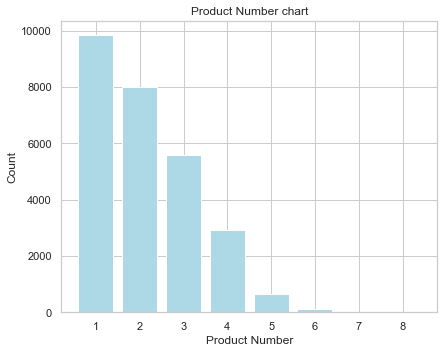

Text(0.5, 1.0, 'Product Number chart')

In [185]:
fig = plt.figure(figsize = (6, 5)) 
plt.bar(df_order_amount['ProductNum'], df_order_amount['Count'], color ='lightblue', width = 0.8)
plt.xlabel("Product Number")
plt.ylabel("Count")
plt.title("Product Number chart")
plt.show()

C. Category:

In [186]:
df_category_revenue = df.groupby('EnglishProductCategoryName').agg(
    {

        'SalesAmount': 'sum'
    }
)
df_category_revenue = df_category_revenue.reset_index(level=['EnglishProductCategoryName'])
df_category_revenue.columns = ['Category',	'Sales']
df_category_revenue


,Category,Sales
0,Accessories,6.988295e+05
1,Bikes,2.627534e+07
2,Clothing,3.334377e+05


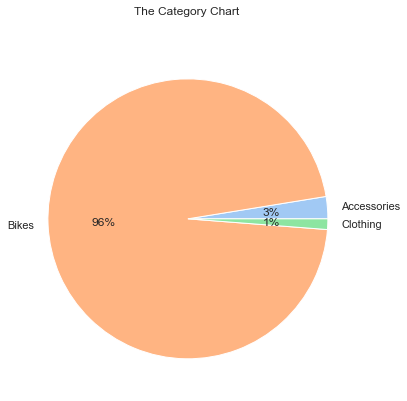

Text(0.5, 1.0, 'The Category Chart \n\n')

In [187]:
plt.figure(figsize=(6, 6))
data = df_category_revenue['Sales']
keys = df_category_revenue['Category']
palette_color = sns.color_palette('pastel')
_ = plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title('The Category Chart \n\n')
plt.show() 

D. Continent:

In [188]:
territory_count = df.groupby(['SalesTerritoryGroup']).agg(
    {

        'SalesOrderNumber': 'count'
    }
)
territory_count = territory_count.reset_index(level=['SalesTerritoryGroup'])
territory_count.columns = ['Continent',	'Count']
territory_count

,Continent,Count
0,Europe,17423
1,North America,27985
2,Pacific,12839


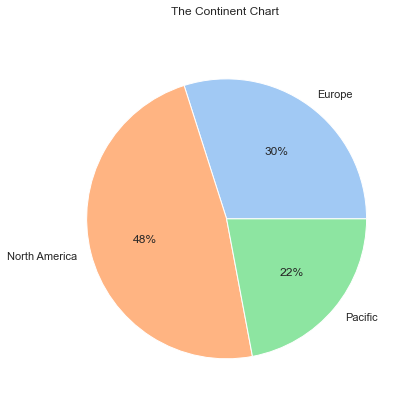

Text(0.5, 1.0, 'The Continent Chart \n\n')

In [189]:

plt.figure(figsize=(6, 6))
data = territory_count['Count']
keys = territory_count['Continent']
palette_color = sns.color_palette('pastel')
_ = plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title('The Continent Chart \n\n')
plt.show() 

In [190]:
df_continent_revenue = df.groupby(['SalesTerritoryGroup']).agg(
    {

        'SalesAmount': 'sum'
    }
)
df_continent_revenue

df_continent_revenue = df_continent_revenue.reset_index(level=['SalesTerritoryGroup'])
df_continent_revenue.columns = ['Continent',	'Revenue']
df_continent_revenue

,Continent,Revenue
0,Europe,8.237723e+06
1,North America,1.061804e+07
2,Pacific,8.451843e+06


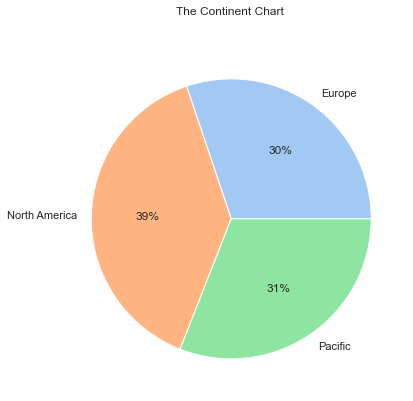

Text(0.5, 1.0, 'The Continent Chart \n\n')

In [191]:

plt.figure(figsize=(6, 6))
data = df_continent_revenue['Revenue']
keys = df_continent_revenue['Continent']
palette_color = sns.color_palette('pastel')
_ = plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title('The Continent Chart \n\n')
plt.show() 

E. Coupon:

In [192]:
df['DiscountAmount'].loc[df['DiscountAmount'] > 0]


Series([], Name: DiscountAmount, dtype: float64)

No customers used coupons for their orders

F. Customer feature table:

In [193]:
#Create table including many features about our customers

from datetime import datetime, date
maxdate = max(df['OrderDate'])
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['Age'] = df['BirthDate'].apply(lambda x: age(x))

df_customer_feature = df.groupby('CustomerKey').agg(
    {
        'Age': 'max',
        'Gender': 'max',
        'YearlyIncome': 'max',
        'SalesTerritoryGroup': 'max',
        'OrderDate': lambda x: (maxdate - x.max()).days,
        'SalesOrderNumber': 'count',
        'SalesAmount': 'sum'
    }
)
df_customer_feature.columns = ['Age', 'Gender', 'YearlyIncome', 'Continent', 'Recency', 'Frequency', 'Monetary']
df_customer_feature = df_customer_feature.reset_index(level=['CustomerKey'])
df_customer_feature.head()

,CustomerKey,Age,Gender,YearlyIncome,Continent,Recency,Frequency,Monetary
0,11000,50,M,90000.0,Pacific,270,7,5929.00
1,11001,46,M,60000.0,Pacific,49,11,6383.88
2,11002,51,M,60000.0,Pacific,339,4,8114.04
3,11003,48,F,70000.0,Pacific,263,9,8139.29
4,11004,42,F,80000.0,Pacific,272,6,8196.01


In [194]:
df_customer_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18405 entries, 0 to 18404
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerKey   18405 non-null  int64  
 1   Age           18405 non-null  int64  
 2   Gender        18405 non-null  object 
 3   YearlyIncome  18405 non-null  float64
 4   Continent     18405 non-null  object 
 5   Recency       18405 non-null  int64  
 6   Frequency     18405 non-null  int64  
 7   Monetary      18405 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 1.1+ MB


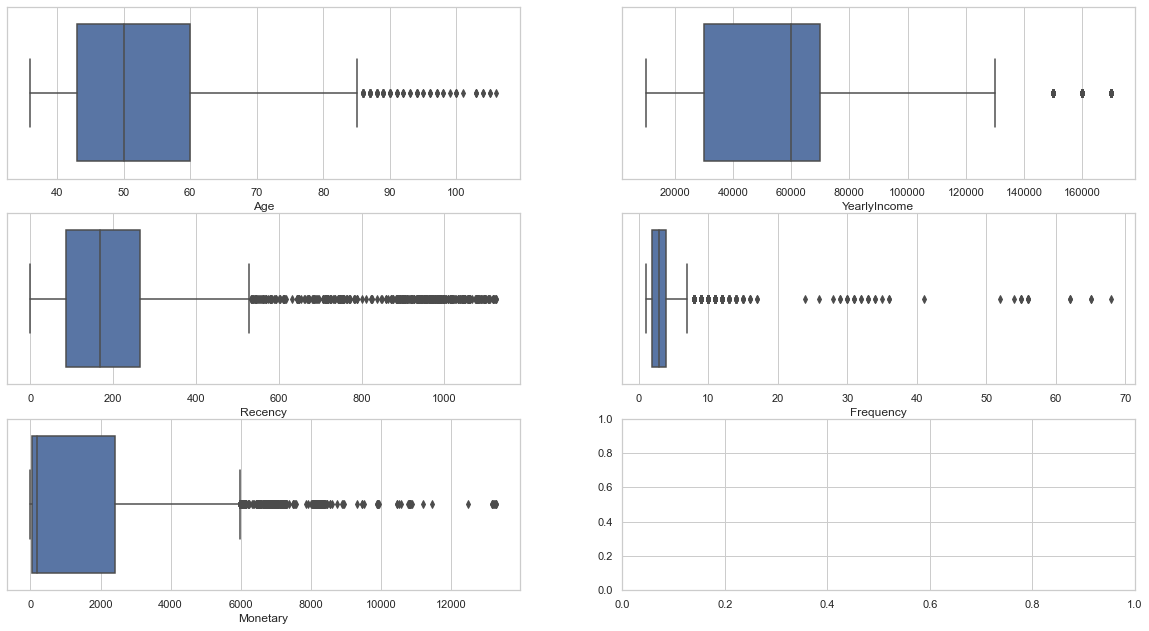

<AxesSubplot:xlabel='Monetary'>

In [195]:
# draw boxplot chart
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,10))
sns.boxplot( ax=axes[0][0], x = df_customer_feature['Age'])
sns.boxplot( ax=axes[0][1],  x = df_customer_feature['YearlyIncome'])
sns.boxplot( ax=axes[1][0],  x = df_customer_feature['Recency'])
sns.boxplot( ax=axes[1][1],  x = df_customer_feature['Frequency'])
sns.boxplot( ax=axes[2][0],  x = df_customer_feature['Monetary'])

G. Age:

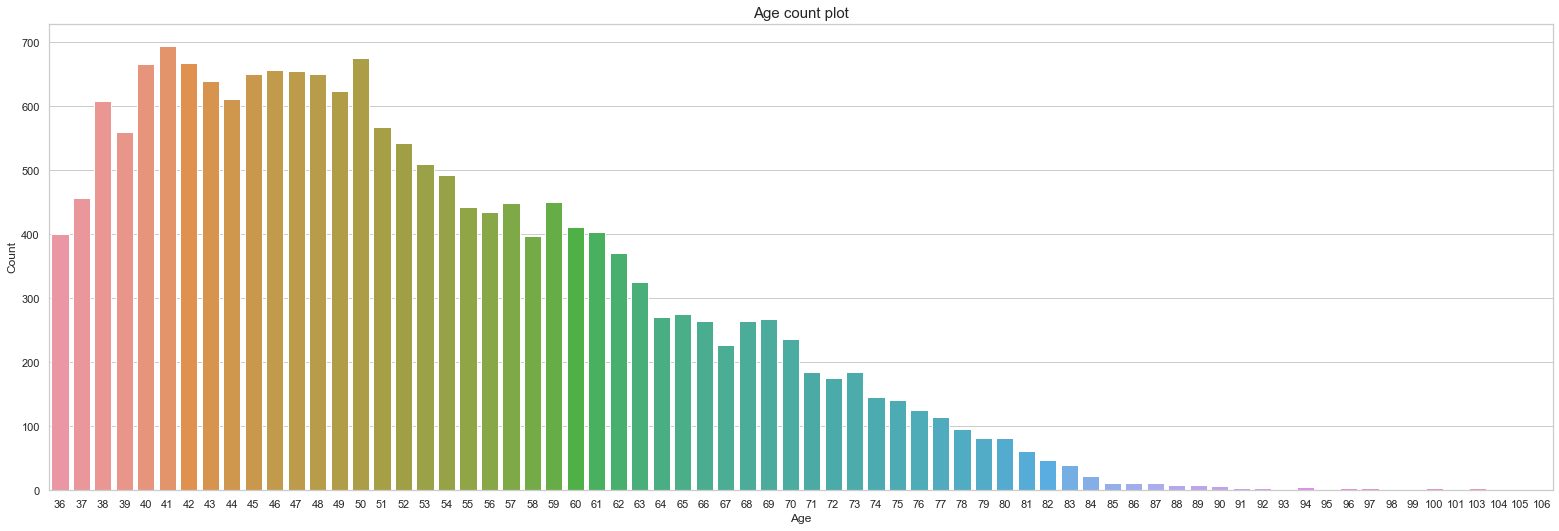

Text(0, 0.5, 'Count')

In [196]:
plt.figure(figsize=(24,8))
_= sns.countplot(df_customer_feature['Age'])
plt.title('Age count plot', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

J. Gender:

In [197]:
df_gender = pd.DataFrame(data = df_customer_feature['Gender'].value_counts()).reset_index()
df_gender.columns = ['Gender', 'Count']
df_gender

,Gender,Count
0,M,9314
1,F,9091


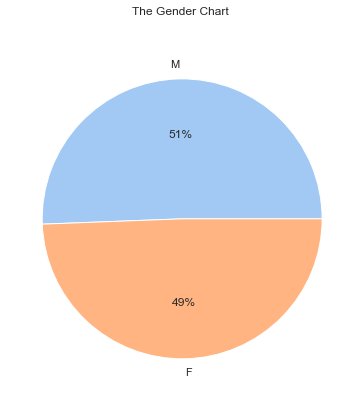

Text(0.5, 1.0, 'The Gender Chart \n\n')

In [198]:
plt.figure(figsize=(6, 6))
data = df_gender['Count'].tolist()
keys = df_gender['Gender'].tolist()
palette_color = sns.color_palette('pastel')
_ = plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title('The Gender Chart \n\n')
plt.show()

M. Recency:

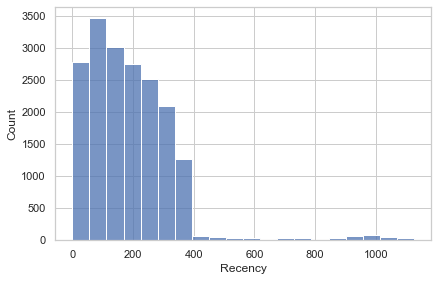

In [199]:
_= sns.histplot(x = 'Recency', data = df_customer_feature, bins = 20)

N. Frequency:

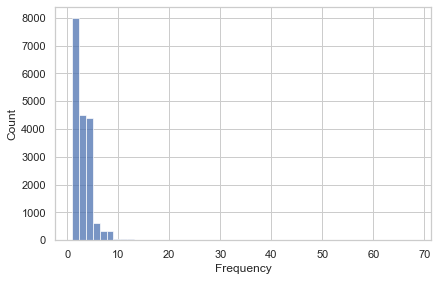

In [200]:
_= sns.histplot(x = 'Frequency', data = df_customer_feature, bins = 50)

O. Monetary:

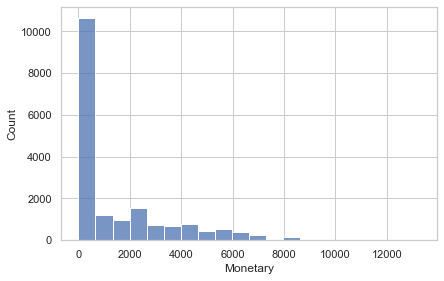

In [201]:
_= sns.histplot(x = 'Monetary', data = df_customer_feature, bins = 20)

P. Yearly Income:

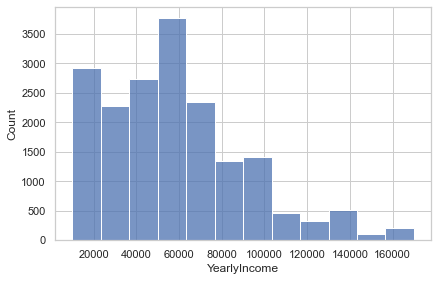

In [202]:
_= sns.histplot(x = 'YearlyIncome', data = df_customer_feature, bins = 12)

In [203]:
bins = np.linspace(min(df_customer_feature['YearlyIncome']), max(df_customer_feature['YearlyIncome']), 4)
bins

array([ 10000.        ,  63333.33333333, 116666.66666667, 170000.        ])

In [204]:
bin_names = ['low income', 'medium income','high income']
df_customer_feature['YearlyIncome_binned'] = pd.cut(df_customer_feature['YearlyIncome'], bins, labels = bin_names, include_lowest=True)
df_customer_feature['YearlyIncome_binned']

0        medium income
1           low income
2           low income
3        medium income
4        medium income
             ...      
18400       low income
18401       low income
18402       low income
18403       low income
18404       low income
Name: YearlyIncome_binned, Length: 18405, dtype: category
Categories (3, object): ['low income' < 'medium income' < 'high income']

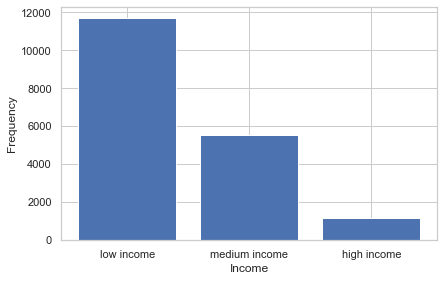

Text(0, 0.5, 'Frequency')

In [205]:
_= plt.bar(bin_names, df_customer_feature['YearlyIncome_binned'].value_counts())
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Binning Yearly Income into high income, medium income, low income

**2\. DATA TRANSFORMATION**

A. Labeling Categories with Dummy variables:

In [206]:
df_customer_feature.head()

,CustomerKey,Age,Gender,YearlyIncome,Continent,Recency,Frequency,Monetary,YearlyIncome_binned
0,11000,50,M,90000.0,Pacific,270,7,5929.00,medium income
1,11001,46,M,60000.0,Pacific,49,11,6383.88,low income
2,11002,51,M,60000.0,Pacific,339,4,8114.04,low income
3,11003,48,F,70000.0,Pacific,263,9,8139.29,medium income
4,11004,42,F,80000.0,Pacific,272,6,8196.01,medium income


In [207]:
arr = ['Continent', 'YearlyIncome_binned', 'Gender']
for i in range(len(arr)):
  dummy_variable_1 = pd.get_dummies(df_customer_feature[arr[i]])
  df_customer_feature = pd.concat([df_customer_feature, dummy_variable_1], axis = 1)



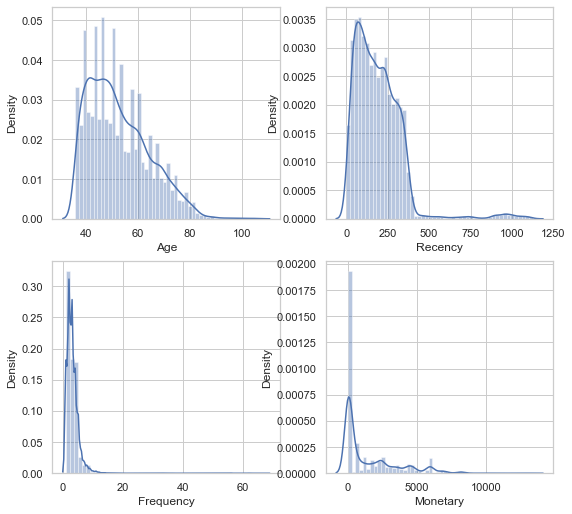

In [208]:

fig, ax = plt.subplots(2, 2, figsize = (8, 8))

_= sns.distplot(df_customer_feature['Age'], ax = ax[0][0])
_= sns.distplot(df_customer_feature['Recency'], ax = ax[0][1])
_= sns.distplot(df_customer_feature['Frequency'], ax = ax[1][0])
_= sns.distplot(df_customer_feature['Monetary'], ax = ax[1][1])



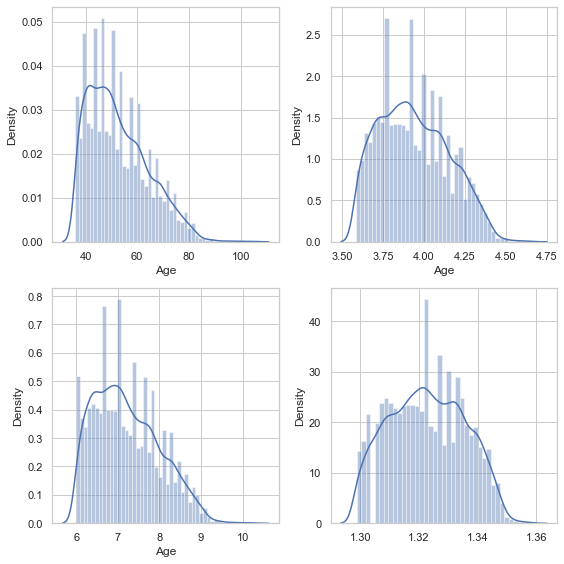

skewness 0.71
log skewness 0.3
sqrt skewness 0.5
boxcox skewness 0.04


In [209]:
from scipy import stats


fig, ax = plt.subplots(2, 2, figsize = (8, 8))
_= sns.distplot(df_customer_feature['Age'], ax = ax[0, 0])
_= sns.distplot(np.log(df_customer_feature['Age']), ax = ax[0, 1])
_= sns.distplot(np.sqrt(df_customer_feature['Age']), ax = ax[1, 0])
_= sns.distplot(stats.boxcox(df_customer_feature['Age'])[0], ax = ax[1, 1])
plt.tight_layout()
plt.show()

print('skewness', df_customer_feature['Age'].skew().round(2))
print('log skewness', np.log(df_customer_feature['Age']).skew().round(2))
print('sqrt skewness', np.sqrt(df_customer_feature['Age']).skew().round(2))
print('boxcox skewness', pd.Series(stats.boxcox(df_customer_feature['Age'])[0]).skew().round(2))



boxcox  skewness -\> min

Choose boxcox method

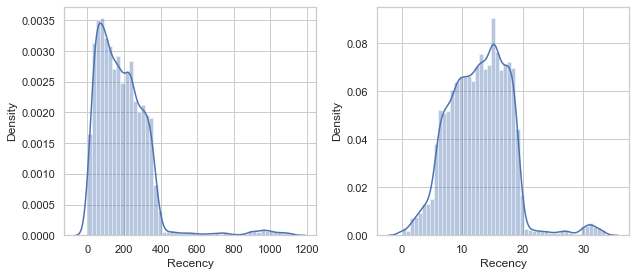

skewness 2.5
sqrt skewness 0.55


In [210]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9, 4))
_= sns.distplot(df_customer_feature['Recency'], ax = ax1 )
_= sns.distplot(np.sqrt(df_customer_feature['Recency']), ax = ax2 )

plt.tight_layout()
plt.show()

print('skewness', df_customer_feature['Recency'].skew().round(2))

print('sqrt skewness', np.sqrt(df_customer_feature['Recency']).skew().round(2))


sqrt skewness -\> min

Choose sqrt method sqrt

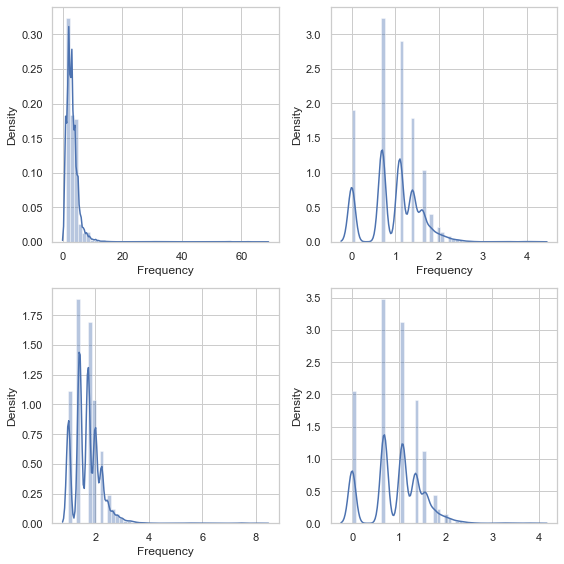

skewness 9.96
log skewness 0.07
sqrt skewness 2.08
boxcox skewness -0.0


In [211]:
g, ax = plt.subplots(2, 2, figsize = (8, 8))
_= sns.distplot(df_customer_feature['Frequency'], ax = ax[0, 0])
_= sns.distplot(np.log(df_customer_feature['Frequency']), ax = ax[0, 1])
_= sns.distplot(np.sqrt(df_customer_feature['Frequency']), ax = ax[1, 0])
_= sns.distplot(stats.boxcox(df_customer_feature['Frequency'])[0], ax = ax[1, 1])
plt.tight_layout()
plt.show()

print('skewness', df_customer_feature['Frequency'].skew().round(2))
print('log skewness', np.log(df_customer_feature['Frequency']).skew().round(2))
print('sqrt skewness', np.sqrt(df_customer_feature['Frequency']).skew().round(2))
print('boxcox skewness', pd.Series(stats.boxcox(df_customer_feature['Frequency'])[0]).skew().round(2))

boxcox  skewness -\> min

Choose boxcox method

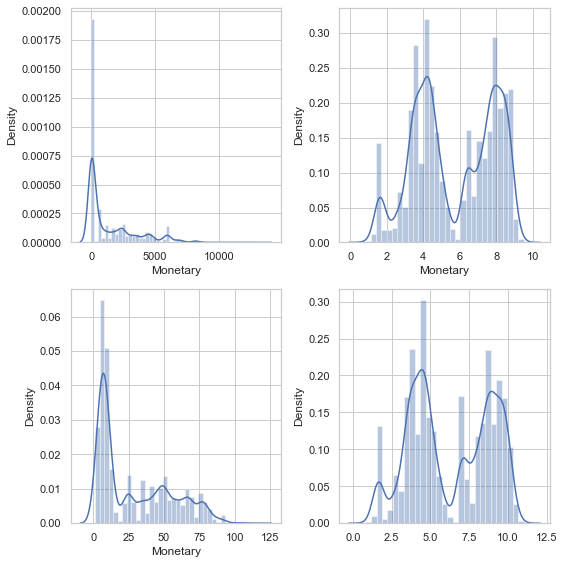

skewness 1.49
log skewness -0.1
sqrt skewness 0.73
boxcox skewness -0.03


In [212]:
g, ax = plt.subplots(2, 2, figsize = (8, 8))
_= sns.distplot(df_customer_feature['Monetary'], ax = ax[0, 0])
_= sns.distplot(np.log(df_customer_feature['Monetary']), ax = ax[0, 1])
_= sns.distplot(np.sqrt(df_customer_feature['Monetary']), ax = ax[1, 0])
_= sns.distplot(stats.boxcox(df_customer_feature['Monetary'])[0], ax = ax[1, 1])
plt.tight_layout()
plt.show()

print('skewness', df_customer_feature['Monetary'].skew().round(2))
print('log skewness', np.log(df_customer_feature['Monetary']).skew().round(2))
print('sqrt skewness', np.sqrt(df_customer_feature['Monetary']).skew().round(2))
print('boxcox skewness', pd.Series(stats.boxcox(df_customer_feature['Monetary'])[0]).skew().round(2))

boxcox skewness -\> min

Choose boxcox method

In [213]:
df_customer_model = pd.DataFrame()
df_customer_model['Age'] = stats.boxcox(df_customer_feature['Age'])[0]
df_customer_model['Gender'] = df_customer_feature['Gender'].copy()
df_customer_model['YearlyIncome_binned'] = df_customer_feature['YearlyIncome_binned'].copy()
df_customer_model['Recency'] = pd.Series(np.sqrt(df_customer_feature['Recency'])).values
df_customer_model['Frequency'] = stats.boxcox(df_customer_feature['Frequency'])[0]
df_customer_model['Monetary'] = stats.boxcox(df_customer_feature['Monetary'])[0]
df_customer_model['Continent'] = df_customer_feature['Continent'].copy()


In [214]:
df_customer_model

,Age,Gender,YearlyIncome_binned,Recency,Frequency,Monetary,Continent
0,1.321930,M,medium income,16.431677,1.882867,9.934458,Pacific
1,1.316573,M,low income,7.000000,2.302648,10.030674,Pacific
2,1.323156,M,low income,18.411953,1.354096,10.344309,Pacific
3,1.319347,F,medium income,16.217275,2.117072,10.348387,Pacific
4,1.310356,F,medium income,16.492423,1.738217,10.357504,Pacific
...,...,...,...,...,...,...,...
18400,1.325490,M,low income,22.605309,0.000000,8.575035,Europe
18401,1.315108,F,low income,13.964240,1.566149,8.796503,Europe
18402,1.328721,M,low income,29.983329,0.000000,9.208069,Europe
18403,1.329733,M,low income,22.293497,0.000000,8.575035,Europe


In [215]:

arr = ['Continent', 'YearlyIncome_binned', 'Gender']
for i in range(len(arr)):
  dummy_variable_1 = pd.get_dummies(df_customer_model[arr[i]])
  df_customer_model = pd.concat([df_customer_model, dummy_variable_1], axis = 1)
df_customer_model = df_customer_model.drop(columns = arr)
df_customer_model

,Age,Recency,Frequency,Monetary,Europe,North America,Pacific,low income,medium income,high income,F,M
0,1.321930,16.431677,1.882867,9.934458,0,0,1,0,1,0,0,1
1,1.316573,7.000000,2.302648,10.030674,0,0,1,1,0,0,0,1
2,1.323156,18.411953,1.354096,10.344309,0,0,1,1,0,0,0,1
3,1.319347,16.217275,2.117072,10.348387,0,0,1,0,1,0,1,0
4,1.310356,16.492423,1.738217,10.357504,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18400,1.325490,22.605309,0.000000,8.575035,1,0,0,1,0,0,0,1
18401,1.315108,13.964240,1.566149,8.796503,1,0,0,1,0,0,1,0
18402,1.328721,29.983329,0.000000,9.208069,1,0,0,1,0,0,0,1
18403,1.329733,22.293497,0.000000,8.575035,1,0,0,1,0,0,0,1


B. Data Standardization:

In [216]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customer_model)
df_customer_scaler = scaler.transform(df_customer_model)
df_customer_scaler

array([[-0.06628182,  0.71259387,  1.65001349, ..., -0.25816148,
        -0.98795625,  0.98795625],
       [-0.48533143, -1.17381323,  2.39528731, ..., -0.25816148,
        -0.98795625,  0.98795625],
       [ 0.02965067,  1.10866412,  0.71124001, ..., -0.25816148,
        -0.98795625,  0.98795625],
       ...,
       [ 0.46495859,  3.42302737, -1.69280433, ..., -0.25816148,
        -0.98795625,  0.98795625],
       [ 0.54413922,  1.88500248, -1.69280433, ..., -0.25816148,
        -0.98795625,  0.98795625],
       [ 0.54413922,  1.9251934 , -1.69280433, ..., -0.25816148,
        -0.98795625,  0.98795625]])

In [217]:
df_customer_scaler = pd.DataFrame(df_customer_scaler)
df_customer_scaler.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.066282,0.712594,1.650013,1.411814,-0.651649,-1.014173,2.032493,-1.320197,1.519951,-0.258161,-0.987956,0.987956
1,-0.485331,-1.173813,2.395287,1.449101,-0.651649,-1.014173,2.032493,0.757463,-0.657916,-0.258161,-0.987956,0.987956
2,0.029651,1.108664,0.711240,1.570648,-0.651649,-1.014173,2.032493,0.757463,-0.657916,-0.258161,-0.987956,0.987956
3,-0.268345,0.669712,2.065818,1.572229,-0.651649,-1.014173,2.032493,-1.320197,1.519951,-0.258161,1.012191,-1.012191
4,-0.971703,0.724743,1.393203,1.575762,-0.651649,-1.014173,2.032493,-1.320197,1.519951,-0.258161,1.012191,-1.012191


C. KNN clustering:

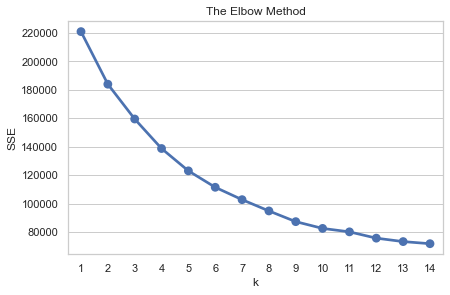

Text(0, 0.5, 'SSE')

In [218]:

from sklearn.cluster import KMeans

sse = {}
for k in range(1, 15):
    kmeans = KMeans( n_clusters = k, random_state = 1)
    kmeans.fit(df_customer_scaler)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
_= sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.show()

In [219]:

from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for k in range(2, 15):
 kmeans = KMeans(n_clusters=k, random_state = 1)
 kmeans.fit(df_customer_scaler)

 score = silhouette_score(df_customer_scaler, kmeans.labels_)
 silhouette_coefficients.append(score)

KMeans(n_clusters=14, random_state=1)

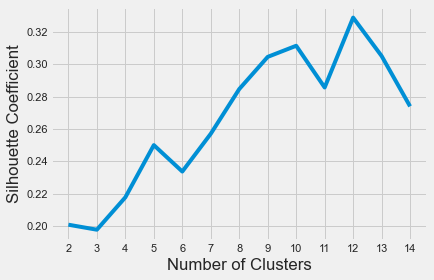

Text(0, 0.5, 'Silhouette Coefficient')

In [220]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [221]:
model = KMeans( n_clusters = 12, random_state = 1)
model.fit(df_customer_scaler)

KMeans(n_clusters=12, random_state=1)

In [222]:
df_customer_feature['Cluster'] = model.labels_ + 1
df_customer_feature.head()

,CustomerKey,Age,Gender,YearlyIncome,Continent,Recency,Frequency,Monetary,YearlyIncome_binned,Europe,North America,Pacific,low income,medium income,high income,F,M,Cluster
0,11000,50,M,90000.0,Pacific,270,7,5929.00,medium income,0,0,1,0,1,0,0,1,10
1,11001,46,M,60000.0,Pacific,49,11,6383.88,low income,0,0,1,1,0,0,0,1,12
2,11002,51,M,60000.0,Pacific,339,4,8114.04,low income,0,0,1,1,0,0,0,1,12
3,11003,48,F,70000.0,Pacific,263,9,8139.29,medium income,0,0,1,0,1,0,1,0,5
4,11004,42,F,80000.0,Pacific,272,6,8196.01,medium income,0,0,1,0,1,0,1,0,5


In [223]:
df_customer_feature.groupby('Cluster').agg(
    {
        'Age': 'mean',
        'YearlyIncome': 'mean',
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean',
        'high income': 'mean',
        'medium income': 'mean',
        'low income': 'mean',
        'F': 'mean',
        'M': 'mean',
        'Europe': 'mean',
        'North America': 'mean',
        'Pacific': 'mean'
    }
).round(2)

,Age,YearlyIncome,Recency,Frequency,Monetary,high income,medium income,low income,F,M,Europe,North America,Pacific
Cluster,,,,,,,,,,,,,
1,56.99,81490.85,170.63,3.39,1431.90,0.0,1.00,0.00,0.00,1.00,0.17,0.83,0.00
2,52.59,47790.79,175.42,2.98,807.17,0.0,0.00,1.00,1.00,0.00,0.00,1.00,0.00
3,49.08,25406.76,180.14,3.01,1343.26,0.0,0.00,1.00,0.00,1.00,1.00,0.00,0.00
4,55.61,36377.95,161.47,3.47,2089.38,0.0,0.00,1.00,1.00,0.00,0.00,0.00,1.00
5,47.64,83376.48,168.02,3.73,2669.73,0.0,1.00,0.00,1.00,0.00,0.00,0.00,1.00
6,49.22,25761.02,178.54,3.09,1393.40,0.0,0.00,1.00,1.00,0.00,1.00,0.00,0.00
7,50.81,48235.29,795.98,1.00,2778.30,0.0,0.03,0.97,0.48,0.52,0.09,0.90,0.01
8,57.31,135200.00,174.58,3.65,2184.22,1.0,0.00,0.00,0.48,0.52,0.46,0.40,0.14
9,57.07,80782.51,171.01,3.34,1491.44,0.0,1.00,0.00,1.00,0.00,0.17,0.83,0.00


All feature, except age, gender.

In [224]:
df_customer_model1 = pd.DataFrame()
df_customer_model1['YearlyIncome_binned'] = df_customer_feature['YearlyIncome_binned'].copy()
df_customer_model1['Recency'] = pd.Series(np.sqrt(df_customer_feature['Recency'])).values
df_customer_model1['Frequency'] = stats.boxcox(df_customer_feature['Frequency'])[0]
df_customer_model1['Monetary'] = stats.boxcox(df_customer_feature['Monetary'])[0]
df_customer_model1['Continent'] = df_customer_feature['Continent'].copy()


In [225]:
df_customer_model1

,YearlyIncome_binned,Recency,Frequency,Monetary,Continent
0,medium income,16.431677,1.882867,9.934458,Pacific
1,low income,7.000000,2.302648,10.030674,Pacific
2,low income,18.411953,1.354096,10.344309,Pacific
3,medium income,16.217275,2.117072,10.348387,Pacific
4,medium income,16.492423,1.738217,10.357504,Pacific
...,...,...,...,...,...
18400,low income,22.605309,0.000000,8.575035,Europe
18401,low income,13.964240,1.566149,8.796503,Europe
18402,low income,29.983329,0.000000,9.208069,Europe
18403,low income,22.293497,0.000000,8.575035,Europe


In [226]:
arr = ['Continent', 'YearlyIncome_binned']
for i in range(len(arr)):
  dummy_variable_1 = pd.get_dummies(df_customer_model1[arr[i]])
  df_customer_model1 = pd.concat([df_customer_model1, dummy_variable_1], axis = 1)
df_customer_model1 = df_customer_model1.drop(columns = arr)
df_customer_model1

,Recency,Frequency,Monetary,Europe,North America,Pacific,low income,medium income,high income
0,16.431677,1.882867,9.934458,0,0,1,0,1,0
1,7.000000,2.302648,10.030674,0,0,1,1,0,0
2,18.411953,1.354096,10.344309,0,0,1,1,0,0
3,16.217275,2.117072,10.348387,0,0,1,0,1,0
4,16.492423,1.738217,10.357504,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
18400,22.605309,0.000000,8.575035,1,0,0,1,0,0
18401,13.964240,1.566149,8.796503,1,0,0,1,0,0
18402,29.983329,0.000000,9.208069,1,0,0,1,0,0
18403,22.293497,0.000000,8.575035,1,0,0,1,0,0


In [227]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customer_model1)
df_customer_scaler = scaler.transform(df_customer_model1)
df_customer_scaler

array([[ 0.71259387,  1.65001349,  1.41181357, ..., -1.32019734,
         1.51995125, -0.25816148],
       [-1.17381323,  2.39528731,  1.44910125, ...,  0.75746252,
        -0.65791584, -0.25816148],
       [ 1.10866412,  0.71124001,  1.57064841, ...,  0.75746252,
        -0.65791584, -0.25816148],
       ...,
       [ 3.42302737, -1.69280433,  1.1303064 , ...,  0.75746252,
        -0.65791584, -0.25816148],
       [ 1.88500248, -1.69280433,  0.88497888, ...,  0.75746252,
        -0.65791584, -0.25816148],
       [ 1.9251934 , -1.69280433,  0.88497888, ...,  0.75746252,
        -0.65791584, -0.25816148]])

In [228]:
df_customer_scaler = pd.DataFrame(df_customer_scaler)
df_customer_scaler.head()

,0,1,2,3,4,5,6,7,8
0,0.712594,1.650013,1.411814,-0.651649,-1.014173,2.032493,-1.320197,1.519951,-0.258161
1,-1.173813,2.395287,1.449101,-0.651649,-1.014173,2.032493,0.757463,-0.657916,-0.258161
2,1.108664,0.711240,1.570648,-0.651649,-1.014173,2.032493,0.757463,-0.657916,-0.258161
3,0.669712,2.065818,1.572229,-0.651649,-1.014173,2.032493,-1.320197,1.519951,-0.258161
4,0.724743,1.393203,1.575762,-0.651649,-1.014173,2.032493,-1.320197,1.519951,-0.258161


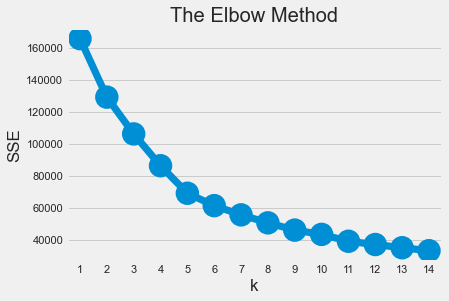

<AxesSubplot:title={'center':'The Elbow Method'}, xlabel='k', ylabel='SSE'>

In [229]:

from sklearn.cluster import KMeans

sse = {}
for k in range(1, 15):
    kmeans = KMeans( n_clusters = k, random_state = 1)
    kmeans.fit(df_customer_scaler)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.show()

In [230]:

from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for k in range(2, 15):
 kmeans = KMeans(n_clusters=k, random_state = 1)
 kmeans.fit(df_customer_scaler)

 score = silhouette_score(df_customer_scaler, kmeans.labels_)
 silhouette_coefficients.append(score)

KMeans(n_clusters=14, random_state=1)

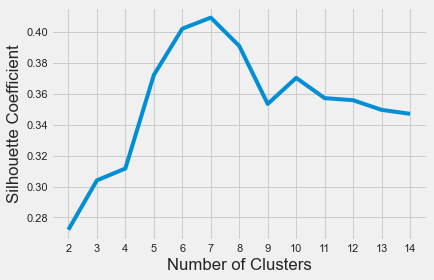

Text(0, 0.5, 'Silhouette Coefficient')

In [231]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [235]:
model = KMeans( n_clusters = 7, random_state = 1)
model.fit(df_customer_scaler)

KMeans(n_clusters=7, random_state=1)

In [236]:
df_customer_feature['Cluster'] = model.labels_+ 1
df_customer_feature.head()

,CustomerKey,Age,Gender,YearlyIncome,Continent,Recency,Frequency,Monetary,YearlyIncome_binned,Europe,North America,Pacific,low income,medium income,high income,F,M,Cluster
0,11000,50,M,90000.0,Pacific,270,7,5929.00,medium income,0,0,1,0,1,0,0,1,5
1,11001,46,M,60000.0,Pacific,49,11,6383.88,low income,0,0,1,1,0,0,0,1,7
2,11002,51,M,60000.0,Pacific,339,4,8114.04,low income,0,0,1,1,0,0,0,1,7
3,11003,48,F,70000.0,Pacific,263,9,8139.29,medium income,0,0,1,0,1,0,1,0,5
4,11004,42,F,80000.0,Pacific,272,6,8196.01,medium income,0,0,1,0,1,0,1,0,5


In [237]:
df_customer_feature.groupby('Cluster').agg(
    {
        'YearlyIncome': 'mean',
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean',
        'high income': 'mean',
        'medium income': 'mean',
        'low income': 'mean',        
        'Europe': 'mean',
        'North America': 'mean',
        'Pacific': 'mean'
    }
).round(2)

,YearlyIncome,Recency,Frequency,Monetary,high income,medium income,low income,Europe,North America,Pacific
Cluster,,,,,,,,,,
1,81138.08,170.45,3.37,1461.74,0.0,1.00,0.00,0.17,0.83,0.00
2,48292.22,775.58,1.00,2702.72,0.0,0.04,0.96,0.11,0.88,0.01
3,25579.93,178.28,3.05,1366.15,0.0,0.00,1.00,1.00,0.00,0.00
4,47804.10,174.93,2.97,792.59,0.0,0.00,1.00,0.00,1.00,0.00
5,83459.02,170.76,3.66,2579.11,0.0,1.00,0.00,0.00,0.00,1.00
6,135200.00,174.58,3.65,2184.22,1.0,0.00,0.00,0.46,0.40,0.14
7,35466.58,163.74,3.43,1993.55,0.0,0.00,1.00,0.00,0.00,1.00


Monetary: 

0 - 1000: Low spending

1000 - 2000: Medium spending

2000: High spending

Frequency: 

1 - 2: Low frequency

2 - 3: Medium frequency

over 3: High frequency

In Europe: 

2: Low income, low frequency,  high spending, customer churn

3: Low income, high frequency, medium spending

1: Medium income, high frequency,  medium spending

6: High income, high frequency,  medium spending

In North America:

2: Low income, low frequency,  high spending, customer churn

4: Low income, medium frequency, low spending

1: Medium income, high frequency,  medium spending

6: High income, high frequency,  medium spending

In Pacific:

2: Low income, low frequency, high spending, customer churn

7: Low income, high frequency,  medium spending

5: Medium income, high frequency, khách hàng rời bỏ, high spending

6: High income, high frequency,  high spending